# 使用手寫辨識資料集, 觀察 PCA 算法

# [作業目標]
- 試著模仿範例寫法, 以變更參數後的 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

# [作業重點]
- 以手寫辨識資料集, 觀察變更參數後的 PCA 算法, 在取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [9]:
SGDClassifier().get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [6]:
PCA().get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [8]:
# 先執行 GridSearchCV 跑出最佳參數
param_grid = {'pca__n_components':[4,10,15,20,30,40,50,60], 
              'logistic__alpha': np.logspace(-4, 4, 5),}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
search.fit(X_digits, y_digits)

print('Best parameter (CV score=%0.3f):' % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.913):
{'logistic__alpha': 0.0001, 'pca__n_components': 30}


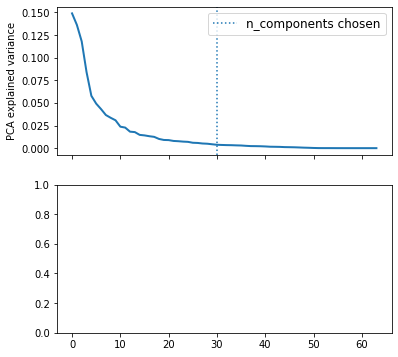

In [20]:
# 繪製不同 components 的 PCA 解釋度
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop= dict(size=12))

In [21]:
# 繪製不同採樣點的分類正確率
result = pd.DataFrame(search.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.099418,0.009706,0.000599,0.000489,0.0001,4,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.728022,0.588398,0.701950,0.700280,0.687324,0.681195,0.048242,16
1,0.081595,0.006240,0.000797,0.000399,0.0001,10,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.903846,0.845304,0.883008,0.910364,0.839437,0.876392,0.029270,14
2,0.093385,0.013695,0.000399,0.000489,0.0001,15,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.917582,0.834254,0.899721,0.935574,0.859155,0.889257,0.037386,12
3,0.107589,0.007704,0.000599,0.000489,0.0001,20,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.936813,0.839779,0.899721,0.932773,0.878873,0.897592,0.035981,9
4,0.127770,0.012377,0.000399,0.000489,0.0001,30,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.917582,0.867403,0.927577,0.949580,0.904225,0.913274,0.027303,1


In [22]:
components_col = 'param_pca__n_components'
best_clfs = result.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))
best_clfs.head()

,,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
param_pca__n_components,,,,,,,,,,,,,,,,
4,8,0.059640,0.006160,0.000599,0.000489,0.01,4,"{'logistic__alpha': 0.01, 'pca__n_components': 4}",0.766484,0.732044,0.805014,0.775910,0.749296,0.765750,0.024707,15
10,9,0.065040,0.007701,0.000602,0.000492,0.01,10,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.901099,0.861878,0.896936,0.907563,0.836620,0.880819,0.027198,13
15,10,0.081581,0.013869,0.000599,0.000489,0.01,15,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.914835,0.856354,0.902507,0.929972,0.867606,0.894255,0.027979,10
20,11,0.107114,0.016187,0.000799,0.000399,0.01,20,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.928571,0.875691,0.902507,0.952381,0.887324,0.909295,0.027878,2
30,4,0.127770,0.012377,0.000399,0.000489,0.0001,30,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.917582,0.867403,0.927577,0.949580,0.904225,0.913274,0.027303,1


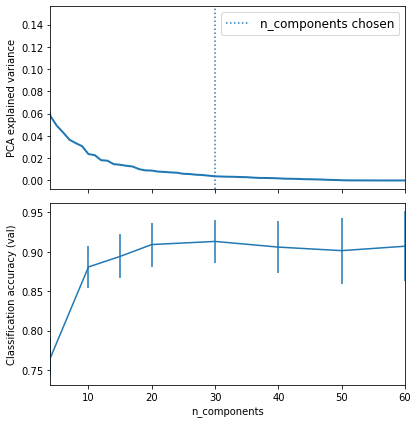

In [26]:
# 繪製不同 components 的 PCA 解釋度
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop= dict(size=12))

# 繪製不同採樣點的分類正確率
result = pd.DataFrame(search.cv_results_)
result.head()

components_col = 'param_pca__n_components'
best_clfs = result.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))
best_clfs.head()

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
plt.tight_layout()
plt.show()